In [618]:

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import joblib
df= pd.read_csv(r"/Users/ajinnuri/Downloads/medical_cost.csv")
df


,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,male,30.970,3,no,northwest,10600.54830
1334,1335,18,female,31.920,0,no,northeast,2205.98080
1335,1336,18,female,36.850,0,no,southeast,1629.83350
1336,1337,21,female,25.800,0,no,southwest,2007.94500


In [576]:
df['sex']=df['sex'].astype('category').cat.codes
df['smoker']=df['smoker'].astype('category').cat.codes
df['region']=df['region'].astype('category').cat.codes
df.head()


,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,0,27.900,0,1,3,16884.92400
1,2,18,1,33.770,1,0,2,1725.55230
2,3,28,1,33.000,3,0,2,4449.46200
3,4,33,1,22.705,0,0,1,21984.47061
4,5,32,1,28.880,0,0,1,3866.85520


In [577]:
x = df.drop('charges', axis=1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [578]:
#Initialize and train the models

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Voting Regressor": VotingRegressor(estimators=[
        ("lr", LinearRegression()),
        ("dt", DecisionTreeRegressor()),
        ("rf", RandomForestRegressor())
    ])
}

results= {}
predictions={}
for model_name, model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    mse= mean_squared_error(y_test, y_pred)
    r2= r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[model_name]={"MSE":mse, "R2":r2}
    predictions[model_name]=y_pred
    print(f"\n {model_name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")  
    print(f"Mean Absolute Error:{mae}")


 Linear Regression:
Mean Squared Error: 33987236.789035685
R^2 Score: 0.7682018945073074
Mean Absolute Error:4165.876528755485

 Decision Tree:
Mean Squared Error: 44376003.77607464
R^2 Score: 0.6973489292913322
Mean Absolute Error:3176.30015149005

 Random Forest:
Mean Squared Error: 22358408.159589734
R^2 Score: 0.8475122680494819
Mean Absolute Error:2747.7427564398013

 AdaBoost:
Mean Squared Error: 25202205.944517776
R^2 Score: 0.8281171361932996
Mean Absolute Error:3898.0978320377667

 Gradient Boosting:
Mean Squared Error: 20053811.375068597
R^2 Score: 0.8632299673697421
Mean Absolute Error:2524.4512152677044

 Voting Regressor:
Mean Squared Error: 24220863.23180859
R^2 Score: 0.8348100422114326
Mean Absolute Error:2929.8143956175504


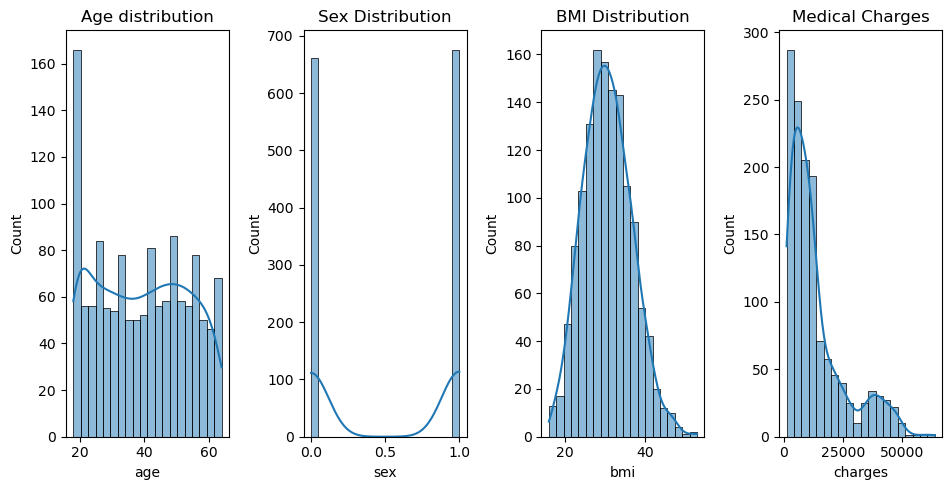

In [579]:
plt.figure(figsize=(12,5))
plt.subplot(1,5,1)
sns.histplot(df['age'],kde=True,bins=20)
plt.title('Age distribution')

plt.subplot(1,5,2)
sns.histplot(df['sex'],kde=True, bins=20)
plt.title('Sex Distribution')

plt.subplot(1,5,3)
sns.histplot(df['bmi'],kde=True,bins=20)
plt.title('BMI Distribution')

plt.subplot(1,5,4)
sns.histplot(df['charges'], kde=True, bins=20)
plt.title('Medical Charges')

plt.tight_layout()
plt.show()

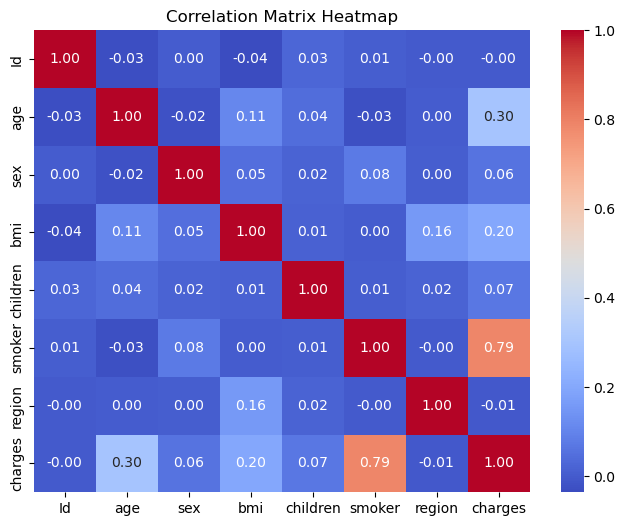

In [580]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [581]:
x = df.drop('charges', axis = 1)
y = df['charges']  # Use square brackets to select the column

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=42)  # Correct the variable names

y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [582]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rfr = RandomForestRegressor()

# Initialize GridSearchCV with cross-validation
grid_search_rf = GridSearchCV(estimator=rfr, param_grid=param_grid_rf, cv=10, n_jobs=-1, scoring='neg_mean_absolute_error')

# Fit the model
grid_search_rf.fit(x_train, y_train)

# Print the best parameters
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")

# Get the best model from the grid search
best_model_rf = grid_search_rf.best_estimator_

# Make predictions on the test set
y_pred_rf = best_model_rf.predict(x_test)

# Evaluate the performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean Absolute Error on Test Set (Random Forest): {mae_rf}")

# Save the best Random Forest model
joblib.dump(best_model_rf, 'best_model_rf.pkl')

# Initialize the Gradient Boosting Regressor with best parameters found earlier
gbr = GradientBoostingRegressor(**grid_search_rf.best_params_)

# Initialize the Voting Regressor with the best models
voting_regressor = VotingRegressor(estimators=[
    ('rf', best_model_rf),
    ('gbr', gbr)
])

# Fit the Voting Regressor on the training data
voting_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred_voting = voting_regressor.predict(x_test)

# Evaluate the performance
mae_voting = mean_absolute_error(y_test, y_pred_voting)
print(f"Mean Absolute Error on Test Set (Voting Regressor): {mae_voting}")

# Save the Voting Regressor model
joblib.dump(voting_regressor, 'voting_regressor.pkl')

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Mean Absolute Error on Test Set (Random Forest): 2836.9385380830604
Mean Absolute Error on Test Set (Voting Regressor): 2986.2120290745106


['voting_regressor.pkl']

In [583]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import joblib

# Sample dataset
X = np.random.rand(100, 5)
y = np.random.rand(100)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=10, n_jobs=- 1, scoring='neg_mean_absolute_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: {mae}")

# Optionally, retrain the model on the entire training set
X_full_train = np.concatenate((X_train, X_test), axis=0)
y_full_train = np.concatenate((y_train, y_test), axis=0)

# Initialize a new model with the best hyperparameters
retrained_model = GradientBoostingRegressor(**grid_search.best_params_)

# Fit the model
retrained_model.fit(X_full_train, y_full_train)

# Save the best model
joblib.dump(best_model, 'best_model.pkl')

# To load the model later
# best_model = joblib.load('best_model.pkl')

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mean Absolute Error on Test Set: 0.24460008003625547


['best_model.pkl']

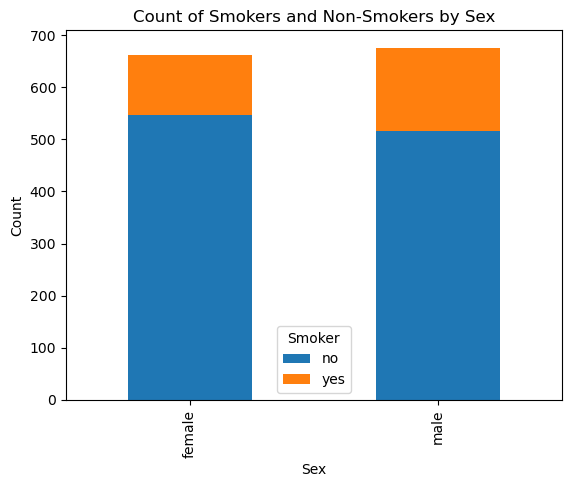

In [584]:
df= pd.read_csv(r"/Users/ajinnuri/Downloads/medical_cost.csv")


# Group the data by sex and smoker status, and count the occurrences
grouped_data = df.groupby(['sex', 'smoker']).size().unstack(fill_value=0)

# Plotting
ax = grouped_data.plot(kind='bar', stacked=True)

# Set plot labels and title
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Count of Smokers and Non-Smokers by Sex')

# Show legend
plt.legend(title='Smoker')

# Show plot
plt.show()

    Feature   Coefficient  Absolute Coefficient
5    smoker  23635.496881          23635.496881
4  children    418.533965            418.533965
3       bmi    336.550405            336.550405
6    region   -270.156815            270.156815
1       age    257.550406            257.550406
2       sex     -9.376418              9.376418
0        Id      0.521021              0.521021


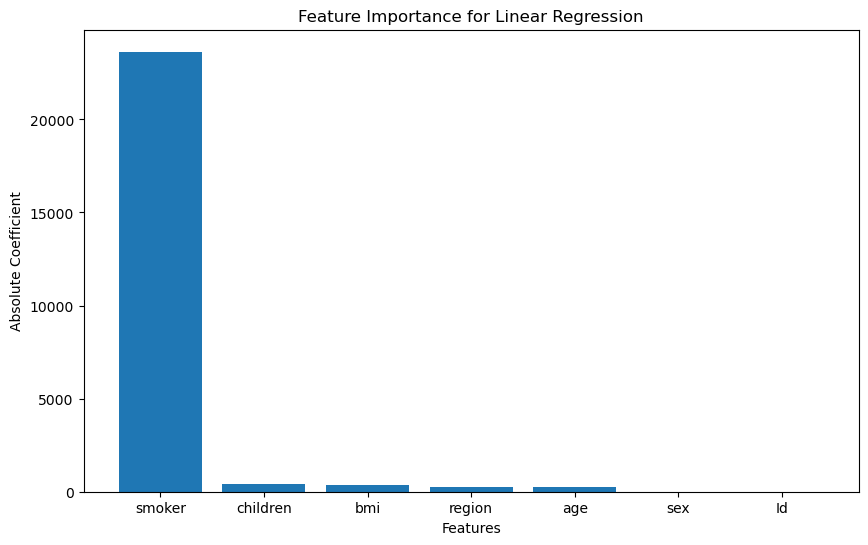

In [585]:
df= pd.read_csv(r"/Users/ajinnuri/Downloads/medical_cost.csv")
df['sex']=df['sex'].astype('category').cat.codes
df['smoker']=df['smoker'].astype('category').cat.codes
df['region']=df['region'].astype('category').cat.codes

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['charges'])
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients and feature names
coefficients = model.coef_
feature_names = X.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
})

# Sort the DataFrame by absolute coefficient values
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Absolute Coefficient'])
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient')
plt.title('Feature Importance for Linear Regression')
plt.show()


    Feature  Importance
5    smoker    0.608498
3       bmi    0.183129
1       age    0.125043
0        Id    0.049397
6    region    0.015556
4  children    0.013208
2       sex    0.005169


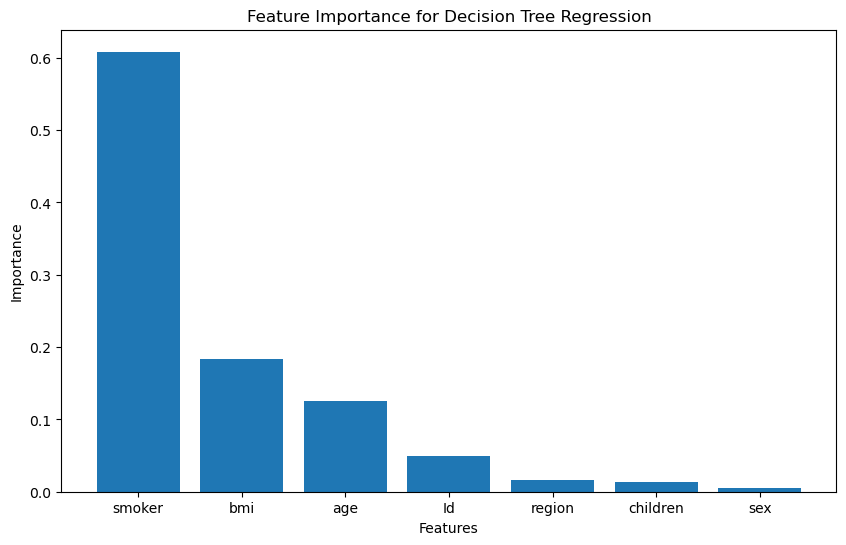

<Figure size 640x480 with 0 Axes>

In [586]:
df= pd.read_csv(r"/Users/ajinnuri/Downloads/medical_cost.csv")
df['sex']=df['sex'].astype('category').cat.codes
df['smoker']=df['smoker'].astype('category').cat.codes
df['region']=df['region'].astype('category').cat.codes

# Split the dataset into features (X) and target (y)
# Replace 'target' with the name of your target column
X = df.drop(columns=['charges'])
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree regression model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Get the feature importances
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Decision Tree Regression')
plt.show()
plt.savefig('fname')

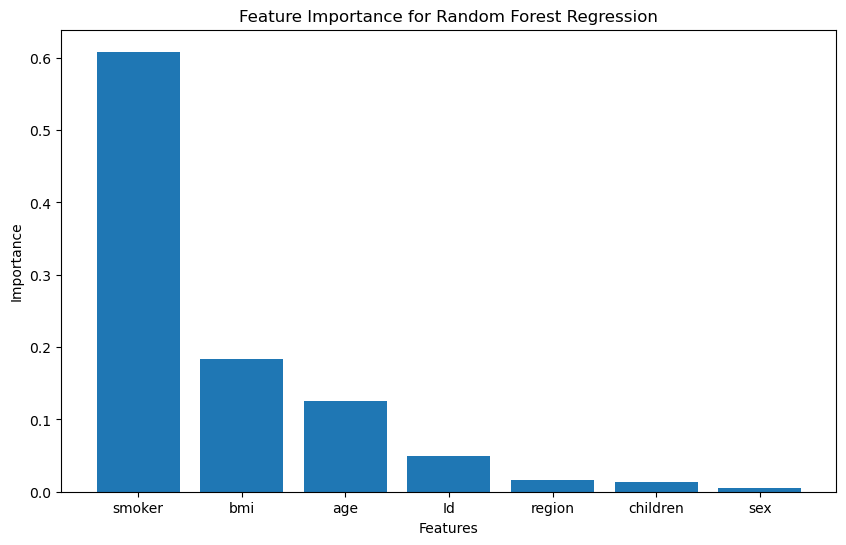

<Figure size 640x480 with 0 Axes>

In [587]:
df= pd.read_csv(r"/Users/ajinnuri/Downloads/medical_cost.csv")

feature_importances = RandomForestRegressor.feature_importances_

# Get feature names if available (assuming X_train is a DataFrame)
# Replace X_train with your actual training data variable
if hasattr(X_train, 'columns'):
    feature_names = X_train.columns
else:
    feature_names = [f'Feature {i}' for i in range(len(feature_importances))]

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Random Forest Regression')
plt.show()
plt.savefig('fname')


<BarContainer object of 7 artists>

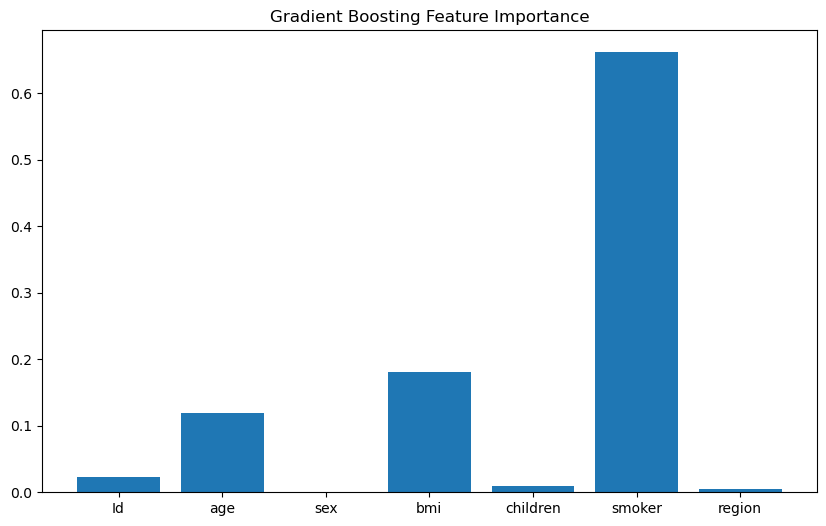

In [588]:
plt.figure(figsize=(10,6))
plt.title('Gradient Boosting Feature Importance')
plt.bar(x= x.columns, height=models["Gradient Boosting"].feature_importances_)


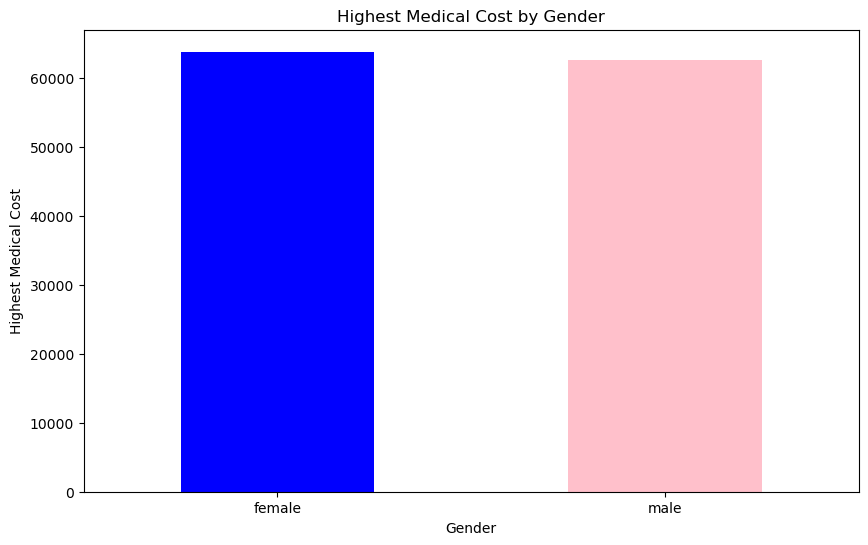

In [589]:
df = pd.read_csv(r"/Users/ajinnuri/Downloads/medical_cost.csv")

# Find the highest medical cost for each gender
max_charges_by_gender = df.groupby('sex')['charges'].max()

# Plot the bar graph
plt.figure(figsize=(10, 6))
max_charges_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Highest Medical Cost')
plt.title('Highest Medical Cost by Gender')
plt.xticks(rotation=0)
plt.show()


<BarContainer object of 7 artists>

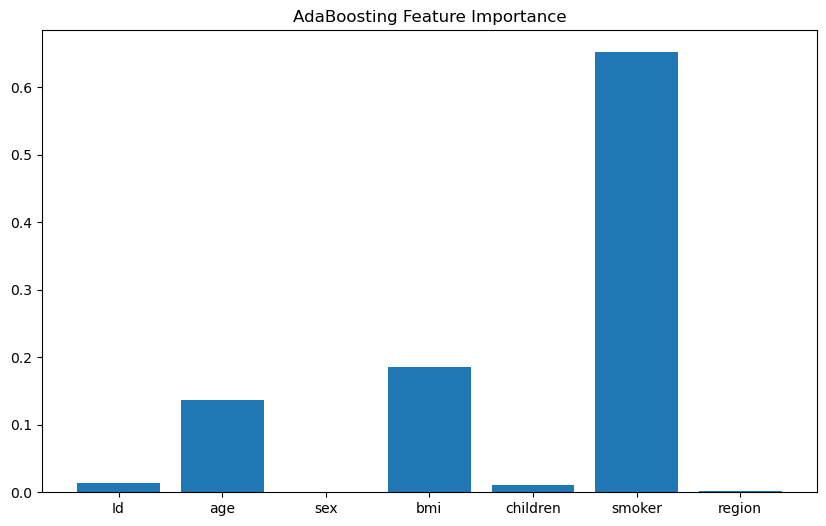

In [590]:
plt.figure(figsize=(10,6))
plt.title('AdaBoosting Feature Importance')
plt.bar(x=x.columns, height=models["AdaBoost"].feature_importances_)

In [591]:
new_instance = pd.DataFrame({
    'Id': [1338],
    'age': [17],
    'sex': [1],
    'bmi': [19.6],
    'children':[2],
    'smoker':[1],
    'region':[3]
})
print("\nSingle instance predictions:")
for model_name, model in models.items():
    prediction = model.predict(new_instance)
    print(f"{model_name} prediction: {prediction[0]}")


Single instance predictions:
Linear Regression prediction: 22806.76587414302
Decision Tree prediction: 12829.4551
Random Forest prediction: 15731.822124799995
AdaBoost prediction: 18923.1689348
Gradient Boosting prediction: 15822.532688022622
Voting Regressor prediction: 17021.367610481004


In [592]:

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gbr = GradientBoostingRegressor()

# Initialize GridSearchCV with cross-validation
grid_search_gb = GridSearchCV(estimator=gbr, param_grid=param_grid_gb, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')

# Fit the model
grid_search_gb.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters for Gradient Boosting: {grid_search_gb.best_params_}")

# Get the best model from the grid search
best_model_gb = grid_search_gb.best_estimator_

# Make predictions on the test set
y_pred_gb = best_model_gb.predict(X_test)

# Evaluate the performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f"\nGradient Boosting Regressor:")
print(f"Mean Squared Error: {mse_gb}")
print(f"R^2 Score: {r2_gb}")  
print(f"Mean Absolute Error: {mae_gb}")

# Save the best Gradient Boosting model
joblib.dump(best_model_gb, 'best_model_gb.pkl')

# Load the saved Gradient Boosting model
loaded_model_gb = joblib.load('best_model_gb.pkl')

# New instance for prediction
new_instance = pd.DataFrame({
    'Id': [1338],
    'age': [17],
    'sex': [1],
    'bmi': [19.6],
    'children': [2],
    'smoker': [1],
    'region': [3]
})

# Drop the 'Id' column if it's not used in the training

# Ensure the new instance is in the same format as the training data
# This may include feature scaling, encoding, etc., if done on training data

# Make prediction on the new instance
prediction = loaded_model_gb.predict(new_instance)
print("\nSingle instance prediction:")
print(f"Gradient Boosting prediction: {prediction[0]}")

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Gradient Boosting Regressor:
Mean Squared Error: 19389047.309925035
R^2 Score: 0.8751097859311499
Mean Absolute Error: 2467.3037474209104

Single instance prediction:
Gradient Boosting prediction: 16813.471192447236


In [593]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rfr = RandomForestRegressor()

# Initialize GridSearchCV with cross-validation
grid_search_rf = GridSearchCV(estimator=rfr, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")

# Get the best model from the grid search
best_model_rf = grid_search_rf.best_estimator_

# Make predictions on the test set
y_pred_rf = best_model_rf.predict(X_test)

# Evaluate the performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"\nRandom Forest Regressor:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R^2 Score: {r2_rf}")  
print(f"Mean Absolute Error: {mae_rf}")

# Save the best Random Forest model
joblib.dump(best_model_rf, 'best_model_rf.pkl')

# Load the saved Random Forest model
loaded_model_rf = joblib.load('best_model_rf.pkl')

# New instance for prediction
new_instance = pd.DataFrame({
    'Id': [1338],
    'age': [17],
    'sex': [1],
    'bmi': [19.6],
    'children': [2],
    'smoker': [1],
    'region': [3]
})

# Ensure the new instance is in the same format as the training data
# This may include feature scaling, encoding, etc., if done on training data

# Make prediction on the new instance
prediction_rf = loaded_model_rf.predict(new_instance)
print("\nSingle instance prediction:")
print(f"Random Forest prediction: {prediction_rf[0]}")

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Random Forest Regressor:
Mean Squared Error: 19426400.708061103
R^2 Score: 0.8748691823669394
Mean Absolute Error: 2541.790753775449

Single instance prediction:
Random Forest prediction: 15797.243736259163


In [594]:

# Define base models
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

# Initialize the Voting Regressor with the base models
voting_regressor = VotingRegressor(estimators=[
    ('lr', lr),
    ('dt', dt),
    ('rf', rf)
])

# Fit the Voting Regressor on the training data
voting_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_voting = voting_regressor.predict(X_test)

# Evaluate the performance
mse_voting = mean_squared_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)
mae_voting = mean_absolute_error(y_test, y_pred_voting)
print(f"\nVoting Regressor:")
print(f"Mean Squared Error: {mse_voting}")
print(f"R^2 Score: {r2_voting}")  
print(f"Mean Absolute Error: {mae_voting}")

# Save the Voting Regressor model
joblib.dump(voting_regressor, 'voting_regressor.pkl')

# Load the saved Voting Regressor model
loaded_voting_regressor = joblib.load('voting_regressor.pkl')

# New instance for prediction
new_instance = pd.DataFrame({
    'Id': [1338],
    'age': [17],
    'sex': [1],
    'bmi': [19.6],
    'children': [2],
    'smoker': [1],
    'region': [3]
})

# Ensure the new instance is in the same format as the training data
# This may include feature scaling, encoding, etc., if done on training data

# Make prediction on the new instance
prediction_voting = loaded_voting_regressor.predict(new_instance)
print("\nSingle instance prediction:")
print(f"Voting Regressor prediction: {prediction_voting[0]}")



Voting Regressor:
Mean Squared Error: 22178894.993076604
R^2 Score: 0.8571396057155427
Mean Absolute Error: 2869.631530493101

Single instance prediction:
Voting Regressor prediction: 17534.711740165647
